[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.92683539 -0.93145951
  0.48392454 -3.82656049 -3.44983567 -1.12457506 -2.02566224  0.62849467
 -1.81604815 -2.8246074   7.19847315  4.66133555  5.10129231  2.86287772
  4.18342591  5.16638388  3.27350963  5.56354703  4.09904197  4.56245938]


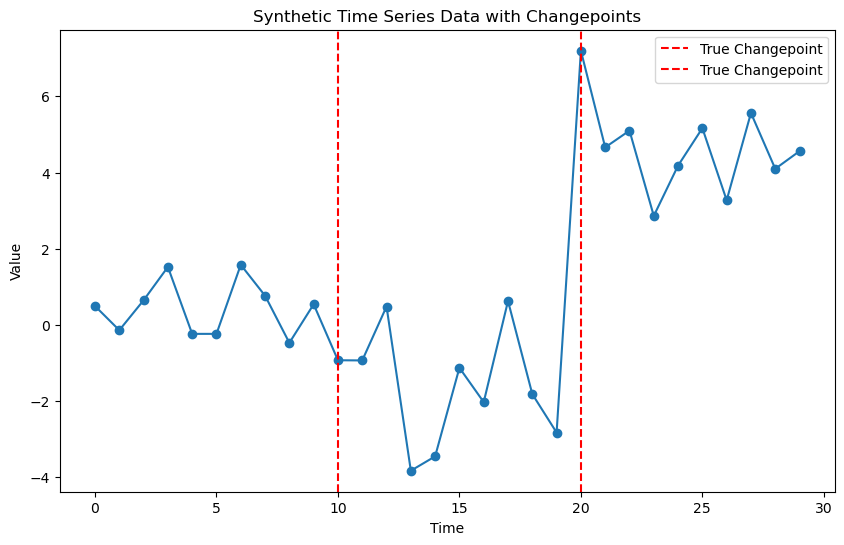

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)  # For reproducibility
n = 300  # Number of data points
data1 = np.random.normal(loc=0, scale=1, size=n//3)
data2 = np.random.normal(loc=0, scale=2, size=n//3)
data3 = np.random.normal(loc=5, scale=1.5, size=n//3)
data = np.concatenate([data1, data2, data3])
print(data)

# Plot the generated data
plt.figure(figsize=(10, 6))
plt.plot(data, marker='o', linestyle='-')
plt.title('Synthetic Time Series Data with Changepoints')
plt.xlabel('Time')
plt.ylabel('Value')
plt.axvline(x=n//3, color='r', linestyle='--', label='True Changepoint')
plt.axvline(x=2*n//3, color='r', linestyle='--', label='True Changepoint')
plt.legend()
plt.show()


1.1779930985099154
[0.68127895 1.3162574  0.53030456 0.34503676 1.41214647 1.41213006
 0.40121972 0.41055837 1.64746748 0.63543305 2.10482848 2.10945261
 0.69406856 5.00455359 4.62782876 2.30256816 3.20365534 0.54949843
 2.99404125 4.0026005  6.02048005 3.48334245 3.92329921 1.68488462
 3.00543281 3.98839079 2.09551654 4.38555393 2.92104887 3.38446628]


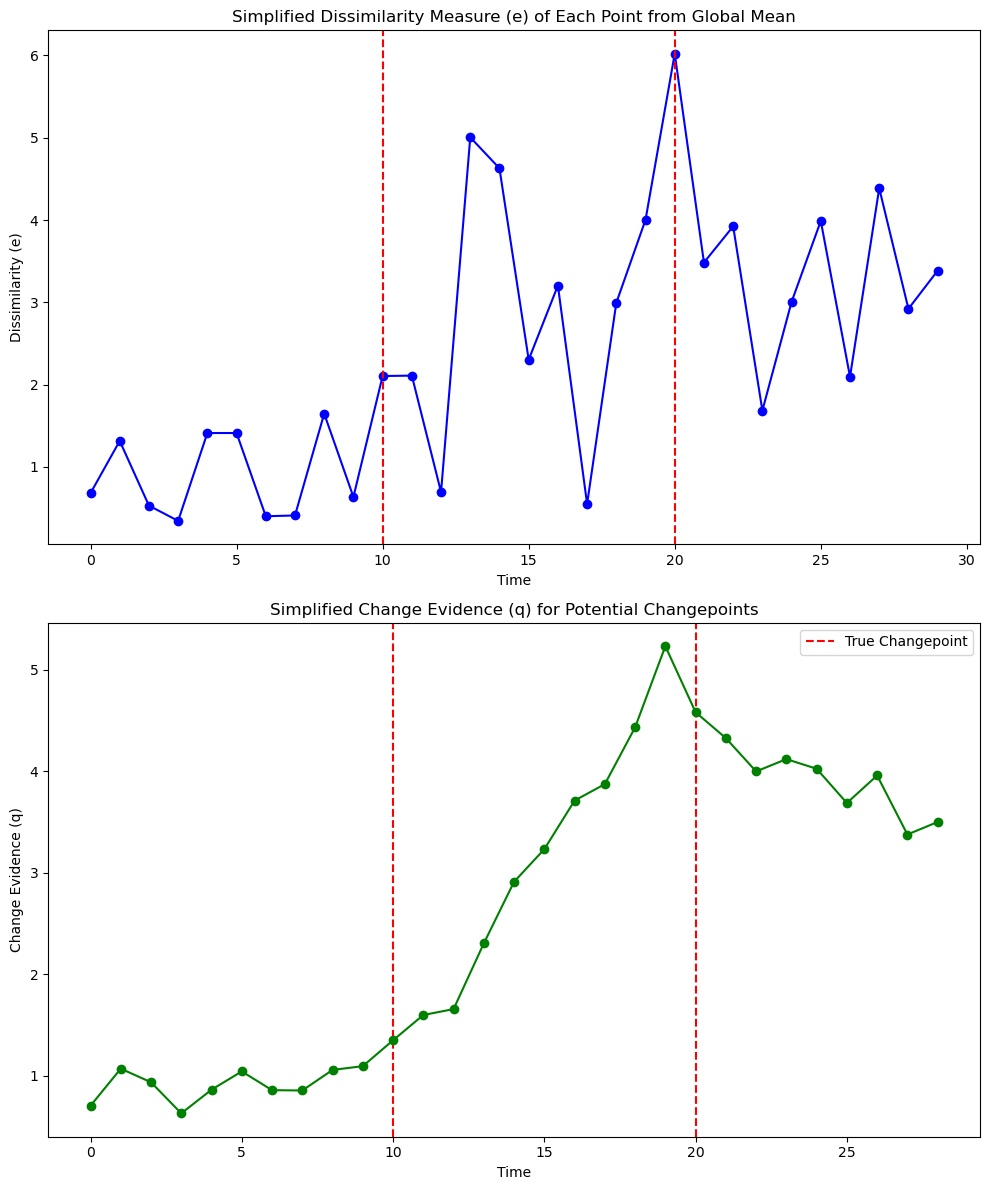

In [7]:
# Simplified demonstration of dissimilarity (e) and change evidence (q) calculations

# Calculate global mean
global_mean = np.mean(data)
print(global_mean)

# Simplified e: Absolute difference of each point from the global mean
e_simplified = np.abs(data - global_mean)
print(e_simplified)

# Simplified q calculation
q_simplified = np.zeros(len(data) - 1)
for i in range(1, len(data)):
    mean_left = np.mean(data[:i])
    mean_right = np.mean(data[i:])
    q_simplified[i-1] = np.abs(mean_right - mean_left)

# Plotting the simplified e and q
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Plot simplified e
ax[0].plot(e_simplified, marker='o', linestyle='-', color='blue')
ax[0].set_title('Simplified Dissimilarity Measure (e) of Each Point from Global Mean')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Dissimilarity (e)')

# Highlighting the true changepoints for context
for axi in ax:
    axi.axvline(x=n//3, color='r', linestyle='--', label='True Changepoint')
    axi.axvline(x=2*n//3, color='r', linestyle='--')

# Plot simplified q
ax[1].plot(q_simplified, marker='o', linestyle='-', color='green')
ax[1].set_title('Simplified Change Evidence (q) for Potential Changepoints')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Change Evidence (q)')
ax[1].legend()

plt.tight_layout()
plt.show()


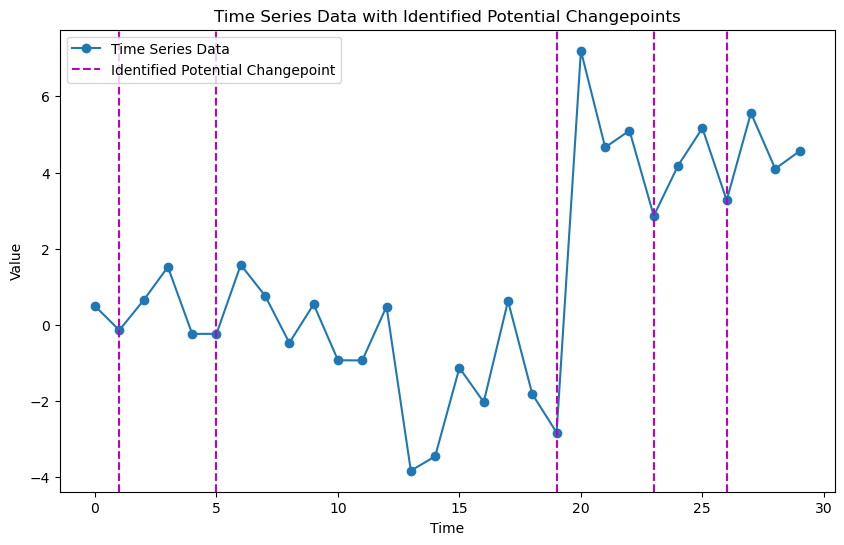

array([ 1,  5, 19, 23, 26])

In [10]:
# Identifying potential changepoints based on the simplified q calculation
# A potential changepoint is identified where the q value has a local maximum

# Calculate the differences in q values to find local maxima
diff_q = np.diff(q_simplified)

# Identify points where the change in q switches from positive to negative, indicating a peak
potential_changepoints = np.where((diff_q[:-1] >= 0) & (diff_q[1:] < 0))[0] + 1

# Plot the original time series with identified potential changepoints highlighted
plt.figure(figsize=(10, 6))
plt.plot(data, marker='o', linestyle='-', label='Time Series Data')
plt.title('Time Series Data with Identified Potential Changepoints')
plt.xlabel('Time')
plt.ylabel('Value')

# Mark the identified potential changepoints
for cp in potential_changepoints:
    plt.axvline(x=cp, color='m', linestyle='--', label='Identified Potential Changepoint' if cp == potential_changepoints[0] else "")

# Add the true changepoints for comparison
# plt.axvline(x=n//3, color='r', linestyle='--', label='True Changepoint')
# plt.axvline(x=2*n//3, color='r', linestyle='--')

plt.legend()
plt.show()

# Return the identified potential changepoints for further analysis
potential_changepoints


threshold %s 5.177124401198805
original changepoints max qs %s [ 1  5 19 23 26] [1.07010876 1.04314181 5.23386233 4.12091859 3.95965521]


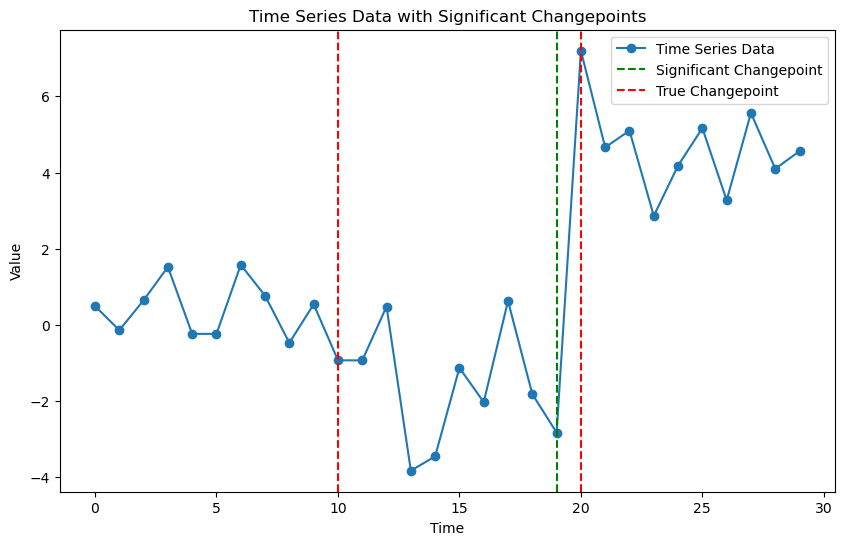

(array([19]), 5.177124401198805)

In [17]:
# Simplified permutation test to assess the significance of identified potential changepoints
num_permutations = 1000  # Number of permutations for the test
alpha = 0.05  # Significance level

# Function to calculate simplified q for a given series
def calculate_q_simplified(series):
    q_simplified = np.zeros(len(series) - 1)
    for i in range(1, len(series)):
        mean_left = np.mean(series[:i])
        mean_right = np.mean(series[i:])
        q_simplified[i-1] = np.abs(mean_right - mean_left)
    return q_simplified

# Store original q values for identified changepoints
original_q_values = q_simplified[potential_changepoints]

# Initialize array to store max q values from each permutation
permuted_max_qs = np.zeros(num_permutations)

# Perform permutations and calculate q
np.random.seed(42)  # For reproducibility
for perm in range(num_permutations):
    permuted_data = np.random.permutation(data)
    permuted_qs = calculate_q_simplified(permuted_data)
    permuted_max_qs[perm] = np.max(permuted_qs)

# Determine significance thresholds
threshold = np.percentile(permuted_max_qs, (1 - alpha) * 100)
print(f"threshold %s", threshold)
print(f"original changepoints max qs %s", potential_changepoints, original_q_values)

# Identify significant changepoints
significant_changepoints = potential_changepoints[original_q_values > threshold]

# Plot original time series with significant changepoints highlighted
plt.figure(figsize=(10, 6))
plt.plot(data, marker='o', linestyle='-', label='Time Series Data')
plt.title('Time Series Data with Significant Changepoints')
plt.xlabel('Time')
plt.ylabel('Value')

# Mark the significant changepoints
for cp in significant_changepoints:
    plt.axvline(x=cp, color='g', linestyle='--', label='Significant Changepoint' if cp == significant_changepoints[0] else "")

# Add the true changepoints for comparison
plt.axvline(x=n//3, color='r', linestyle='--', label='True Changepoint')
plt.axvline(x=2*n//3, color='r', linestyle='--')

plt.legend()
plt.show()

# Output the significant changepoints for further analysis
significant_changepoints, threshold


threshold 14.790780934766342
original changepoints max qs 
 [ 1  5 19 23 26] 
 [ 0.          5.4287326   5.48393863  1.40954263  1.80755478  2.26955081
  1.4664972   1.66480384  1.89438471  2.18530604  2.21065785  2.36236981
  2.63145822  1.48061666  1.47972049  1.72217315  2.01950357  2.15833575
  2.66026672  5.68114997  6.71162292  5.60073894  4.89538117  6.77168819
  5.53708205  4.52287618  7.58608161 31.87227336  0.        ] 


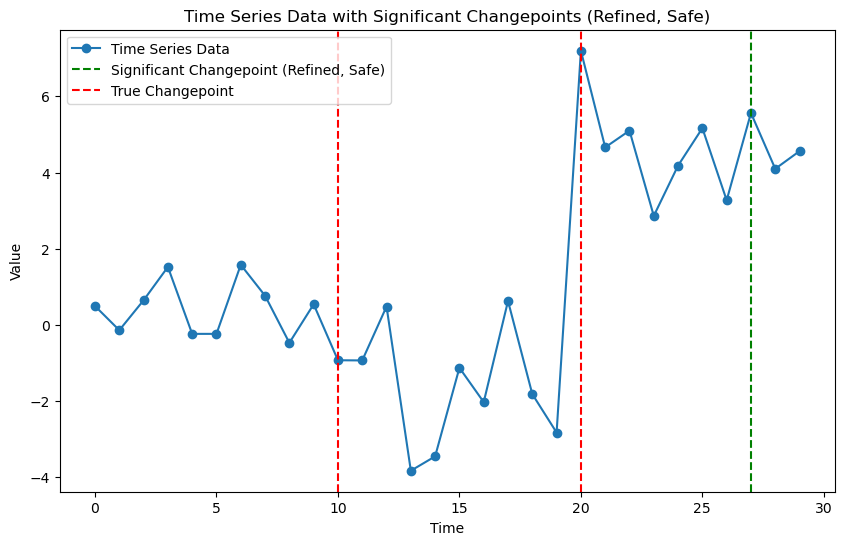

(array([27]), 14.790780934766342)

In [29]:
alpha = 0.2
# Adjusted refined q calculation to handle small segments and avoid computational issues
def calculate_refined_q_safe(series):
    n = len(series)
    refined_q = np.zeros(n - 1)
    for i in range(1, n):
        left, right = series[:i], series[i:]
        # Ensure both segments have more than one data point
        if len(left) > 1 and len(right) > 1:
            mean_left, mean_right = np.mean(left), np.mean(right)
            var_left, var_right = np.var(left, ddof=1), np.var(right, ddof=1)
            # Check to prevent division by zero
            if var_left > 0 and var_right > 0:
                refined_q[i-1] = np.abs(mean_left - mean_right) * (1/var_left + 1/var_right)
            else:
                refined_q[i-1] = 0  # Assign zero to avoid undefined calculations
        else:
            refined_q[i-1] = 0  # Zero for splits resulting in too-small segments
    return refined_q

# Recalculate refined q values with safety checks
refined_q_values_safe = calculate_refined_q_safe(data)

# Recalculate permutation testing with the safe refined q calculation
permuted_refined_max_qs_safe = np.zeros(num_permutations)
for perm in range(num_permutations):
    permuted_data = np.random.permutation(data)
    permuted_refined_qs_safe = calculate_refined_q_safe(permuted_data)
    permuted_refined_max_qs_safe[perm] = np.max(permuted_refined_qs_safe)

# Determine new significance threshold for refined q with safety checks
refined_threshold_safe = np.percentile(permuted_refined_max_qs_safe, (1 - alpha) * 100)
print(f"threshold %s" % refined_threshold_safe)
print(f"original changepoints max qs \n %s \n %s " % (potential_changepoints, refined_q_values_safe))

# Identify significant changepoints with the safe refined q calculation
significant_changepoints_refined_safe = np.where(refined_q_values_safe > refined_threshold_safe)[0]

# Re-plot with adjustments
plt.figure(figsize=(10, 6))
plt.plot(data, marker='o', linestyle='-', label='Time Series Data')
plt.title('Time Series Data with Significant Changepoints (Refined, Safe)')
plt.xlabel('Time')
plt.ylabel('Value')

# Mark the significant changepoints
for cp in significant_changepoints_refined_safe:
    plt.axvline(x=cp, color='g', linestyle='--', label='Significant Changepoint (Refined, Safe)' if cp == significant_changepoints_refined_safe[0] else "")

# Add the true changepoints for comparison
plt.axvline(x=n//3, color='r', linestyle='--', label='True Changepoint')
plt.axvline(x=2*n//3, color='r', linestyle='--')

plt.legend()
plt.show()

# Output the significant changepoints and new threshold for further analysis
significant_changepoints_refined_safe, refined_threshold_safe
